# Cognates

In [1]:
!pip install fuzzywuzzy

In [7]:
def string_similarity(s1, s2, p=0.1):
    def similarity(s1, s2):
        if not s1 and not s2:
            return 1.0

        match_distance = max(len(s1), len(s2)) // 2 - 1
        matches = 0
        transpositions = 0

        s1_matches = [False] * len(s1)
        s2_matches = [False] * len(s2)

        for i in range(len(s1)):
            start = max(0, i - match_distance)
            end = min(i + match_distance + 1, len(s2))

            for j in range(start, end):
                if not s2_matches[j] and s1[i] == s2[j]:
                    s1_matches[i] = s2_matches[j] = True
                    matches += 1
                    break

        if matches == 0:
            return 0.0

        # Transpositions
        k = transpositions = 0
        for i in range(len(s1)):
            if s1_matches[i]:
                while not s2_matches[k]:
                    k += 1

                if s1[i] != s2[k]:
                    transpositions += 1

                k += 1

        transpositions //= 2

        # Jaro similarity
        _sim = (
            (matches / len(s1))
            + (matches / len(s2))
            + ((matches - transpositions) / matches)
        ) / 3.0

        return _sim

    _sim = similarity(s1, s2)
    prefix_length = 0

    for i in range(min(4, min(len(s1), len(s2)))):
        if s1[i] == s2[i]:
            prefix_length += 1
        else:
            break

    _similarity = _sim + (prefix_length * p * (1 - _sim))

    # for phoenetics
    if(abs(len(string1)-len(string2))<=2):
      _similarity += 0.05

    _similarity /= 1.05
    return _similarity


In [27]:
import pandas as pd
df = pd.read_csv('/content/swadesh_list_clean.csv')

In [28]:
df.head()

,English,Sanskrit,Pali,Hindi,Urdu,Nepali,Bhojpuri,Punjabi,Saraiki,Sindhi,Gujarati,Marathi,Konkani,Assamese,Bengali,Odia,Kashmiri,Sinhalese,Dhivehi,Romani
0,I,aham,aham,mai,mai,ma,ham,mai,mai,au,hu,mi,hav,moi,ami,mu,bu,mama,aharen,me
1,you,tvam,tvam,tu,tu,ta,te,tu,tu,tu,tu,tu,tu,toi,tumi,tu,cu,oya,kale,tu
2,he,sa,so,yah,yeh,u,uh,iha,o,hi,te,ha,vho,xi,se,se,huh,eya,ena,ov
3,we,vayam,amhe,ham,ham,hami,hamni,asi,assa,asi,ame,amhi,amhi,ami,amra,ame,as',api,aharemen,amen
4,you,yuyam,tumhe,tum,tum,timiharu,tuhni,tusi,tussa,tavhi,tame,tumhi,tumhi,tohot,tomra,tumemane,toh',oyala,kalemen,tumen


In [29]:
df = df.astype(str)


In [31]:
column_pairs = [(col1, col2) for col1 in df.columns for col2 in df.columns if col1 < col2]

# Apply the function to each pair of values in the columns and sum the results
total_sum = 0
for col1, col2 in column_pairs:
    sum_result = df.apply(lambda row: string_similarity(row[col1], row[col2]), axis=1).sum()
    sum_result /= 207
    print(f"Sum of function results for {col1} and {col2}: {sum_result}")
    total_sum += sum_result

Sum of function results for English and Sanskrit: 0.3205283814669597
Sum of function results for English and Pali: 0.2991943227047897
Sum of function results for English and Hindi: 0.3000372894322745
Sum of function results for English and Urdu: 0.3084011431147387
Sum of function results for English and Nepali: 0.29182173593261695
Sum of function results for English and Punjabi: 0.2894204071452749
Sum of function results for English and Saraiki: 0.2793079114565197
Sum of function results for English and Sindhi: 0.3274348818287167
Sum of function results for English and Gujarati: 0.3093939714827683
Sum of function results for English and Marathi: 0.30858966498488005
Sum of function results for English and Konkani: 0.29498127948783565
Sum of function results for English and Odia: 0.3568338012897479
Sum of function results for English and Kashmiri: 0.20370041736501363
Sum of function results for English and Sinhalese: 0.3004630664605766
Sum of function results for English and Romani: 0.30

In [32]:
result_df = pd.DataFrame(columns=['Column1', 'Column2', 'Sum of Function Results'])

for col1, col2 in column_pairs:
    sum_result = df.apply(lambda row: string_similarity(row[col1], row[col2]), axis=1).sum()
    normalized_sum = sum_result / len(df)
    result_df = result_df.append({'Column1': col1, 'Column2': col2, 'Sum of Function Results': normalized_sum}, ignore_index=True)


<ipython-input-32-074c5088ee05>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Column1': col1, 'Column2': col2, 'Sum of Function Results': normalized_sum}, ignore_index=True)
<ipython-input-32-074c5088ee05>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Column1': col1, 'Column2': col2, 'Sum of Function Results': normalized_sum}, ignore_index=True)
<ipython-input-32-074c5088ee05>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'Column1': col1, 'Column2': col2, 'Sum of Function Results': normalized_sum}, ignore_index=True)
<ipython-input-32-074c5088ee05>:6: FutureWarning: The frame.append method is deprecated and will be removed f

In [33]:
result_df

,Column1,Column2,Sum of Function Results
0,English,Sanskrit,0.320528
1,English,Pali,0.299194
2,English,Hindi,0.300037
3,English,Urdu,0.308401
4,English,Nepali,0.291822
...,...,...,...
185,Romani,Sanskrit,0.427797
186,Romani,Urdu,0.461813
187,Romani,Saraiki,0.453230
188,Romani,Sindhi,0.444435


In [34]:
result_df.to_csv('file.csv')

In [35]:
reversed_df = pd.DataFrame({'Column1': result_df['Column2'], 'Column2': result_df['Column1'], 'Sum of Function Results': result_df['Sum of Function Results']})

In [36]:
reversed_df

,Column1,Column2,Sum of Function Results
0,Sanskrit,English,0.320528
1,Pali,English,0.299194
2,Hindi,English,0.300037
3,Urdu,English,0.308401
4,Nepali,English,0.291822
...,...,...,...
185,Sanskrit,Romani,0.427797
186,Urdu,Romani,0.461813
187,Saraiki,Romani,0.453230
188,Sindhi,Romani,0.444435


In [37]:
result_df = pd.concat([result_df, reversed_df], ignore_index=True)

In [43]:
result_df

,Column1,Column2,Sum of Function Results
0,English,Sanskrit,0.320528
1,English,Pali,0.299194
2,English,Hindi,0.300037
3,English,Urdu,0.308401
4,English,Nepali,0.291822
...,...,...,...
375,Sanskrit,Romani,0.427797
376,Urdu,Romani,0.461813
377,Saraiki,Romani,0.453230
378,Sindhi,Romani,0.444435


In [44]:
sorted_df = result_df.sort_values(by='Column1')

In [45]:
sorted_df

,Column1,Column2,Sum of Function Results
111,Assamese,English,0.293438
112,Assamese,Sanskrit,0.423778
129,Assamese,Romani,0.432568
128,Assamese,Dhivehi,0.395471
126,Assamese,Kashmiri,0.256567
...,...,...,...
292,Urdu,Konkani,0.537116
363,Urdu,Dhivehi,0.439850
231,Urdu,Nepali,0.633207
324,Urdu,Bengali,0.611347


In [47]:
sorted_df = sorted_df.reset_index(drop=True)

In [48]:
sorted_df

,Column1,Column2,Sum of Function Results
0,Assamese,English,0.293438
1,Assamese,Sanskrit,0.423778
2,Assamese,Romani,0.432568
3,Assamese,Dhivehi,0.395471
4,Assamese,Kashmiri,0.256567
...,...,...,...
375,Urdu,Konkani,0.537116
376,Urdu,Dhivehi,0.439850
377,Urdu,Nepali,0.633207
378,Urdu,Bengali,0.611347


In [49]:
sorted_df.to_csv('sorted_scores.csv')

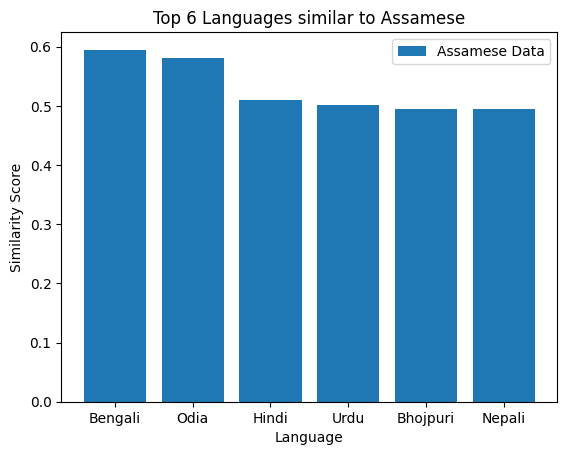

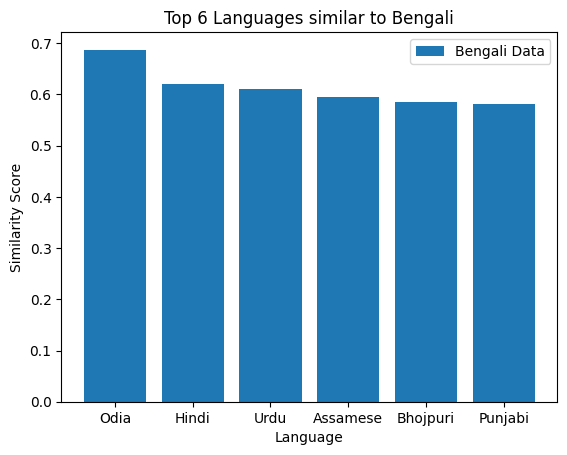

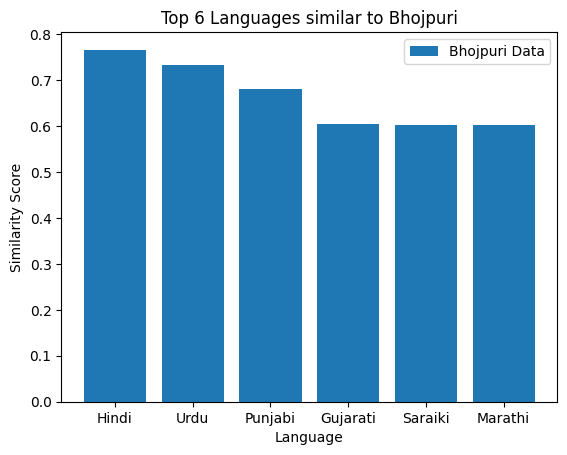

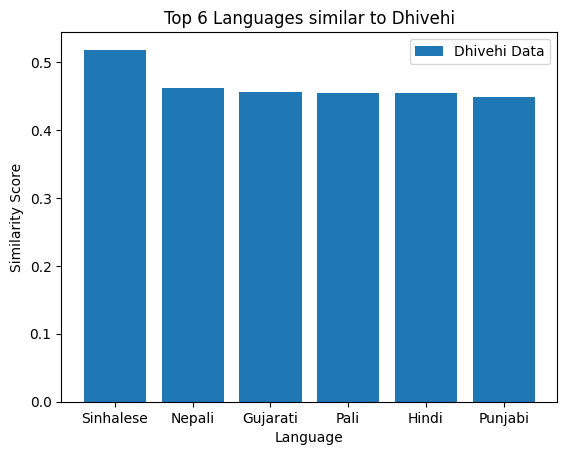

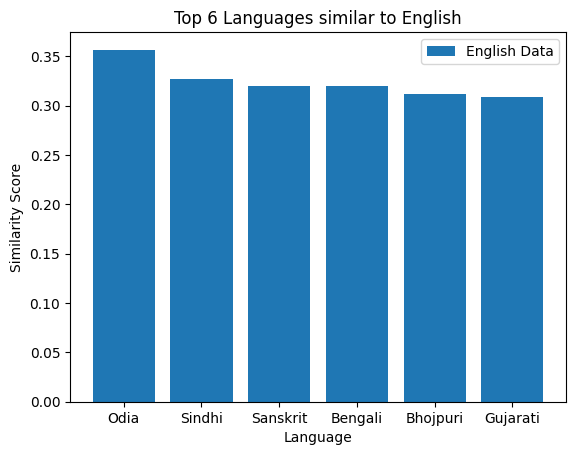

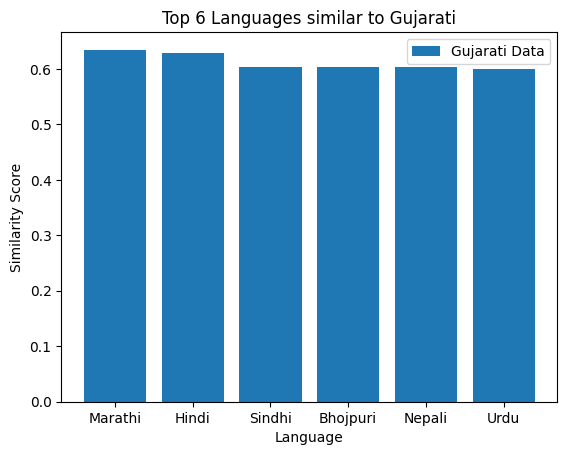

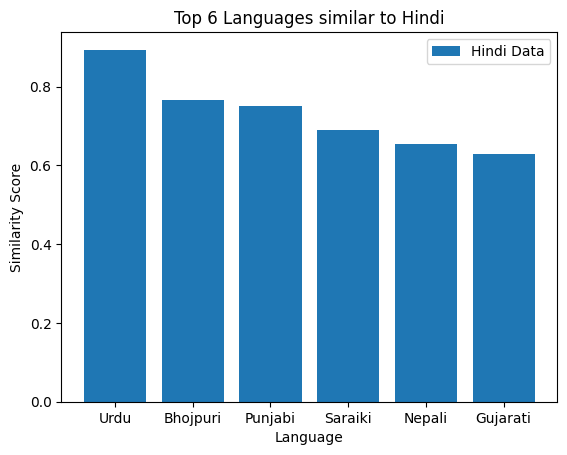

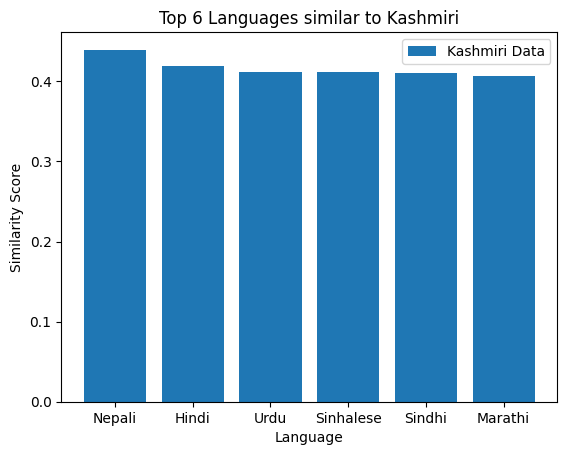

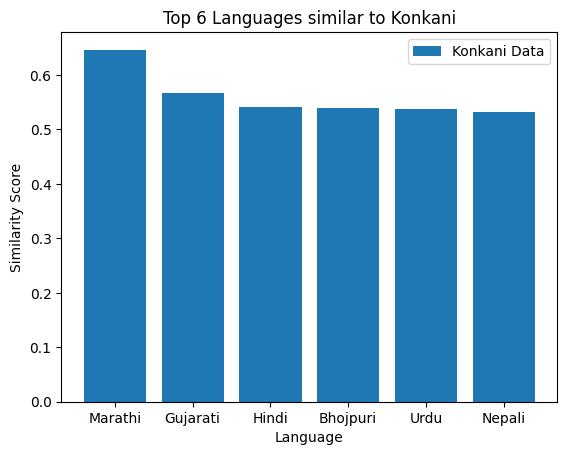

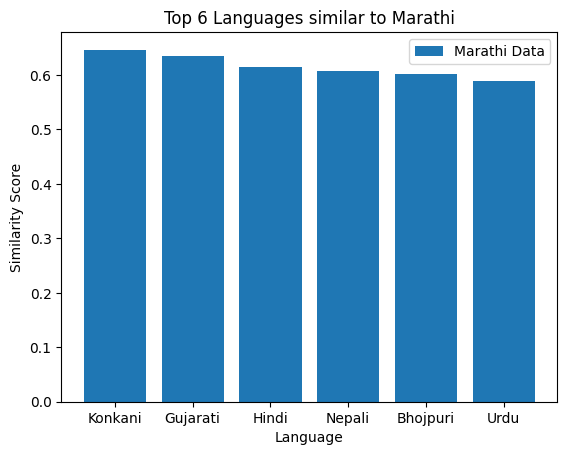

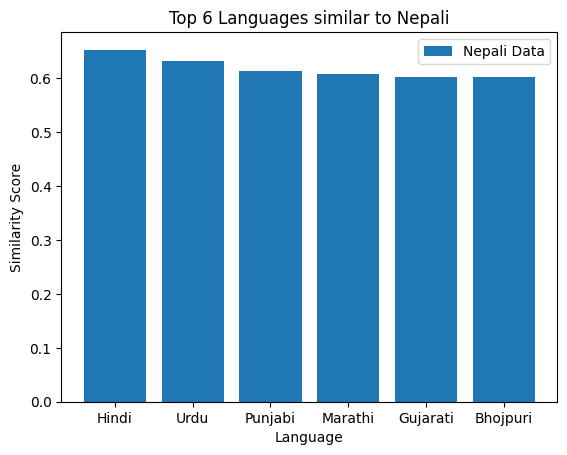

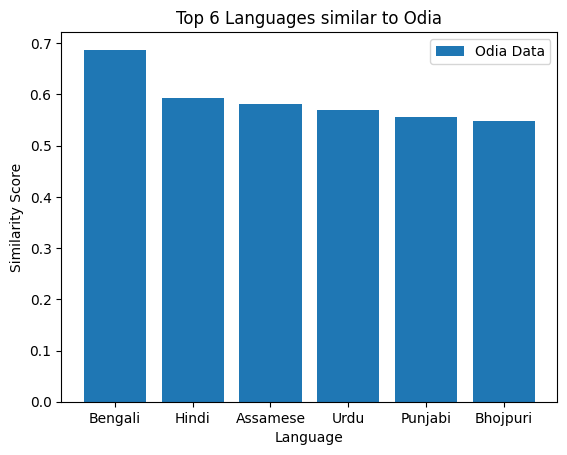

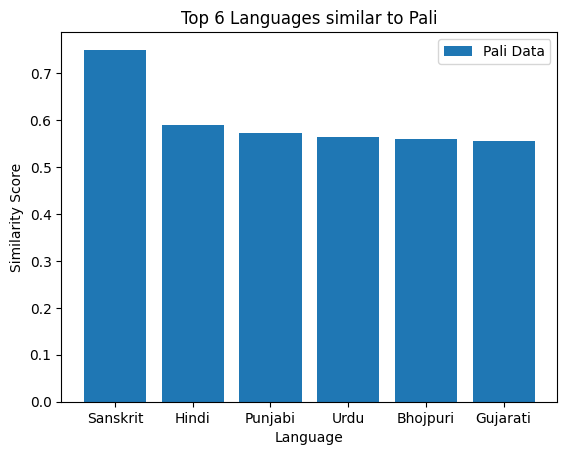

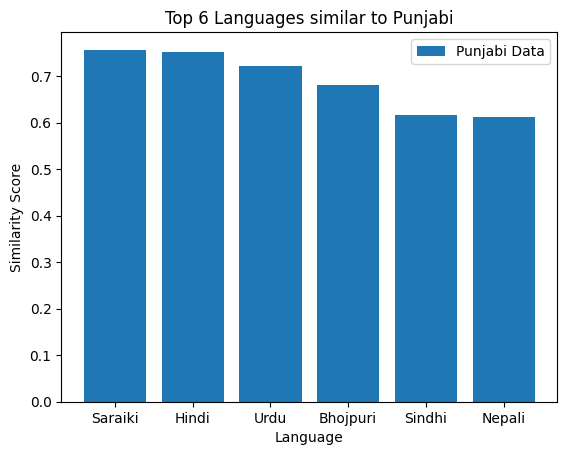

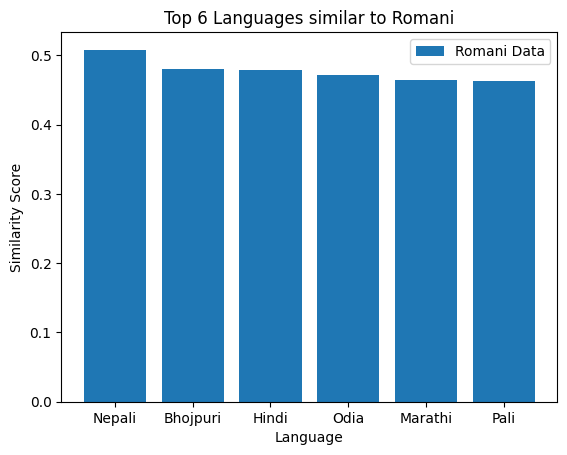

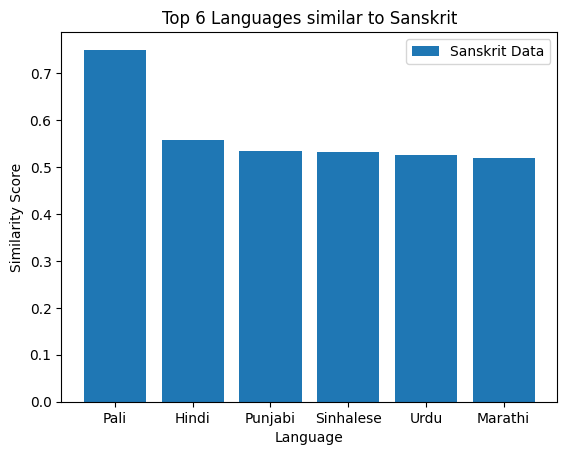

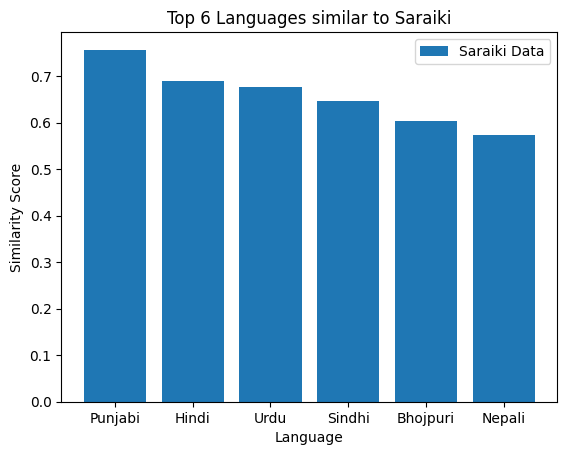

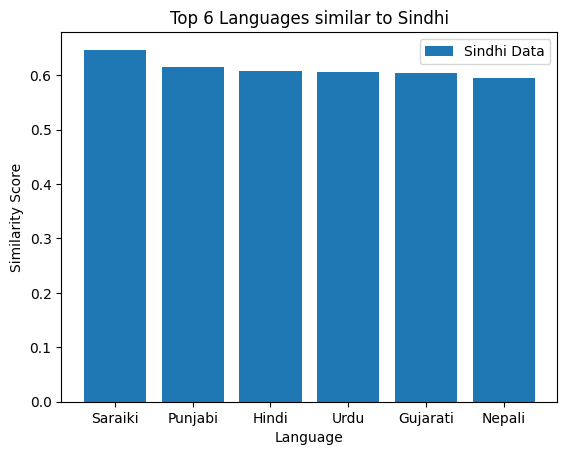

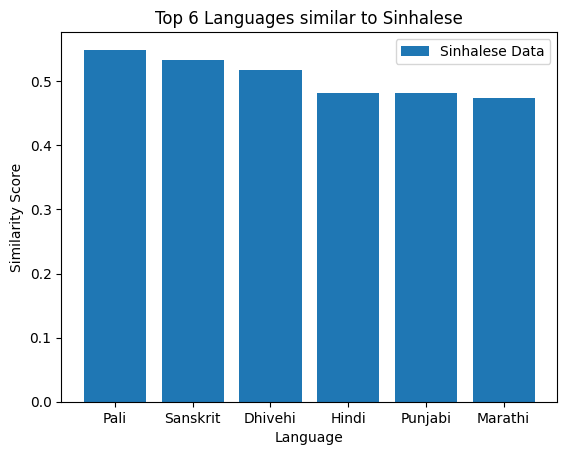

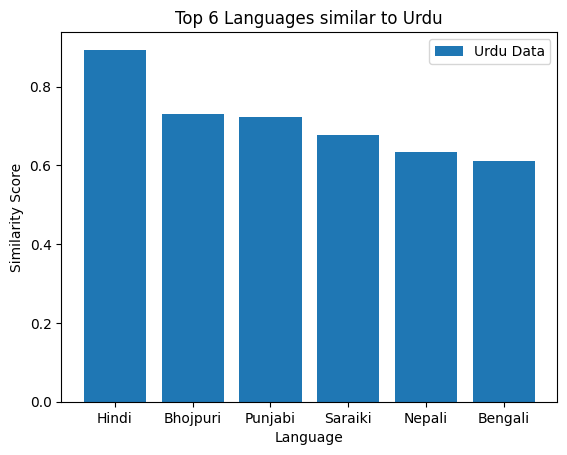

In [75]:
import matplotlib.pyplot as plt

# Get unique values in Column1
unique_values = sorted_df['Column1'].unique()

# Iterate over unique values and create separate bar plots
for value in unique_values:
    filtered_data = sorted_df[sorted_df['Column1'] == value]

    # Check if there is any data for the current value
    if not filtered_data.empty:
        # Sort the data by 'Sum of Function Results' column in descending order
        sorted_data = filtered_data.sort_values(by='Sum of Function Results', ascending=False)

        # Select only the top 6 values
        top_values = sorted_data.head(6)

        plt.bar(top_values['Column2'], top_values['Sum of Function Results'], label=f'{value} Data')
        plt.xlabel('Language')
        plt.ylabel('Similarity Score')
        plt.title(f'Top 6 Languages similar to {value}')
        plt.legend()
        plt.show()
